# 0~4.63h(N=25)

N25
加工開始日：2022/06/18
加工終了日：2022/06/18
回転数：60000rpm
送り速度：1200mm/min
切り込み幅：0.1mm
切り込み深さ：0.1mm
加工時間：4.63h
加工のパターン：Li-X-UD
コメント：Machining was successfully performed


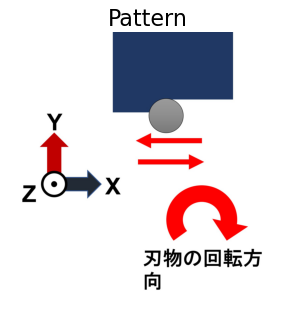

In [1]:
import py_module.negenovation as ngi
import numpy as np
import os


par_dir = os.path.abspath(os.path.join( os.pardir ))
config = ngi.readyaml(par_dir)
ngi.show_pattern_img(config)
#現在の階層の一つ上のフォルダを指定
all_data, length,fig_title = ngi.readtxt2(par_dir,return_type='combine')

# 工具長

stop iteration


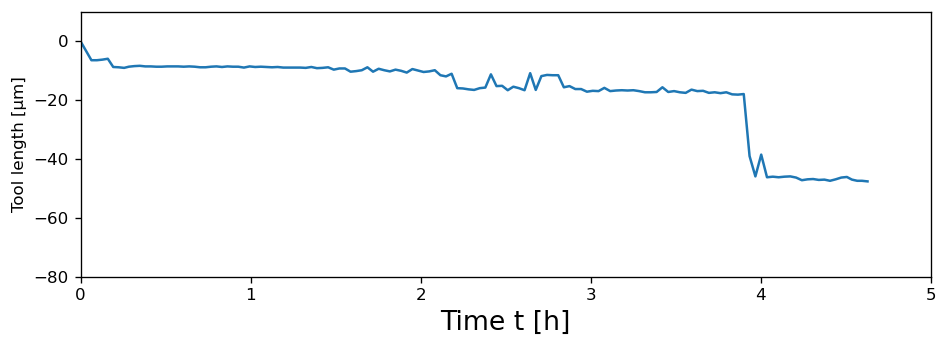

In [8]:
import matplotlib.pyplot as plt


if not os.path.isdir("./image/length"):
    os.makedirs("./image/length")

end_time = round(length[-1,0],1)
extrac_time =  iter(list(np.arange(0,end_time+0.1,0.5)))
time_sta = next(extrac_time)

time_list = []

for i in range(length.shape[0]):
    time_len = length[i,0]
    if time_sta <= time_len:
        #print(time_len)
        time_list.append([length[i,0],(length[i,1]-length[0,1])*1000])
        try:
            time_sta = next(extrac_time)
        except StopIteration:
            print("stop iteration")
            break
time_list = np.array(time_list)
#print(time_list)



for i in range(length.shape[0]):
    fig = plt.figure(0,figsize=(8,3),dpi=120)
    ax = fig.subplots(1,1)
    
    ax.scatter(length[i,0],length[i,2],color='r',s=40,zorder=2)
    ax.plot(length[:,0],length[:,2],c='b',zorder=1)
    
    plt.xlabel("Time t [h]")
    plt.ylabel("Variations in tool length [μm]")
    fig.savefig("./image/length/" + str(round(length[i,0]*60,1)) + "min_length.png")
    plt.clf()

fig0 = plt.figure(0,dpi=100,figsize=(7,4))
ax = fig0.subplots(1,1)
fig0.gca().get_yaxis().get_major_formatter().set_useOffset(False)
ax.plot(length[:,0],length[:,2])
ax.set_xlabel("Time t [h]",fontsize=16)
ax.set_ylabel("Tool length [μm]",fontsize=10)
ax.set_ylim(-80,10)
ax.set_xlim(0,5)
#ax.set_title("N14",fontsize=20)
fig.tight_layout()
fig.savefig("./image/length/length.png")
plt.show()

In [9]:
logi = ( all_data[:,1] <= -52.200 )
all_data[logi,7] = 1600

# 電流値（生データ）

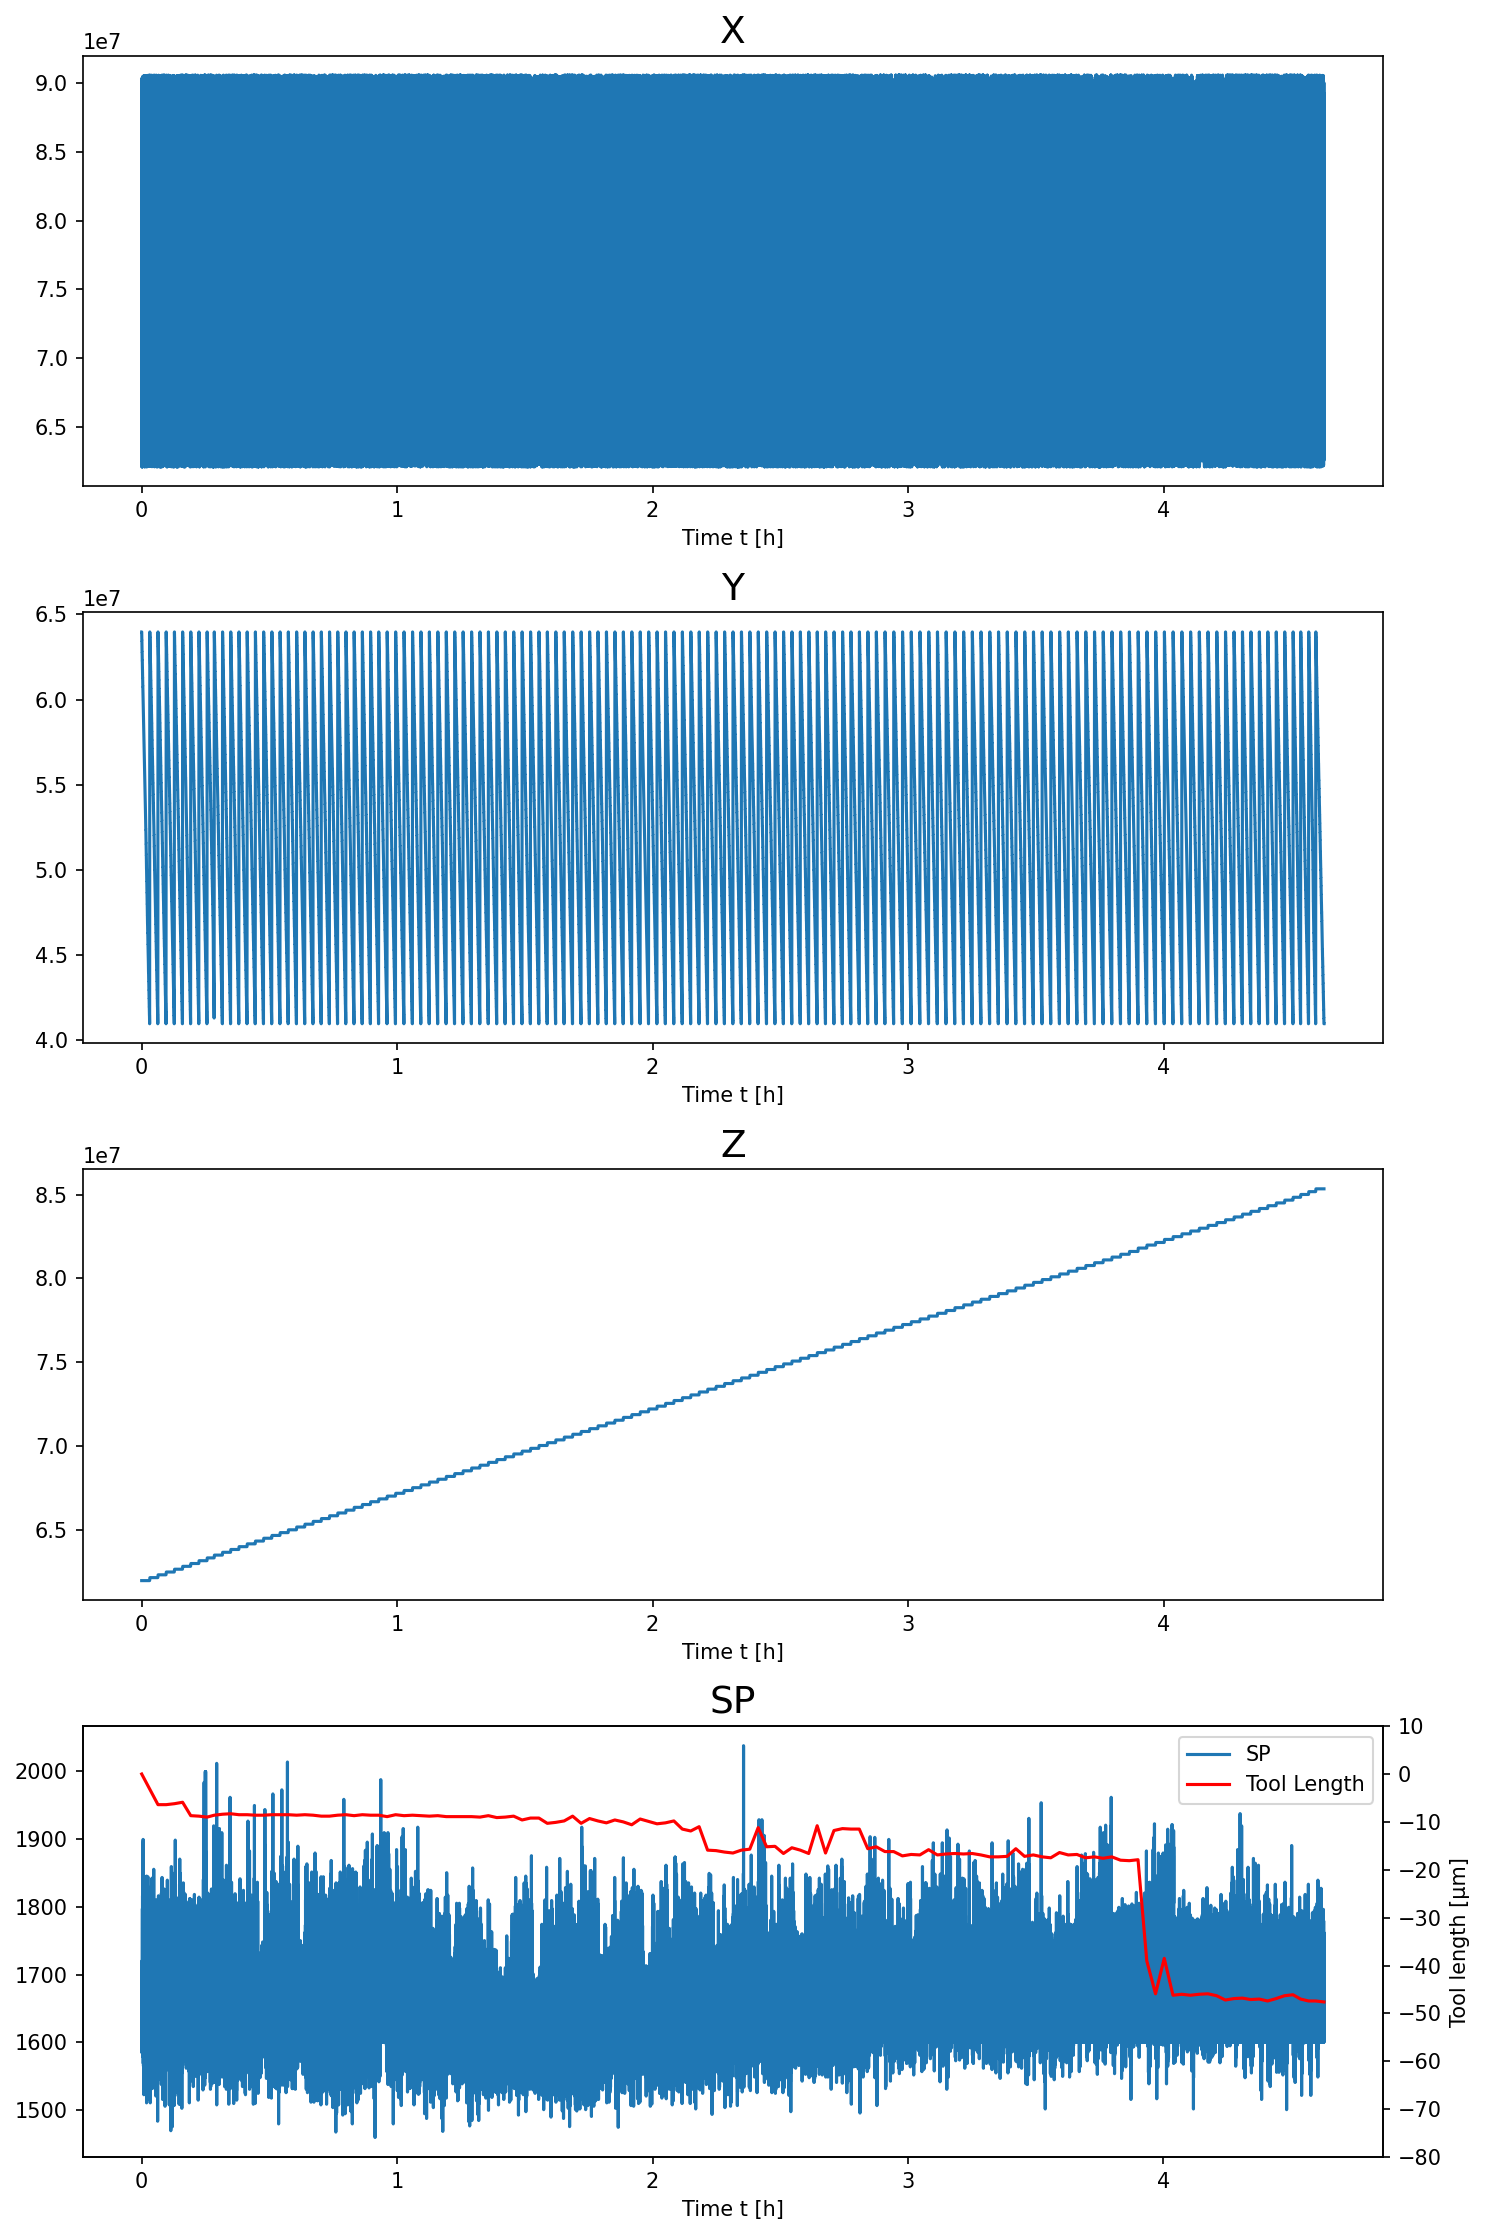

In [4]:
import matplotlib.pyplot as plt

fig1 = plt.figure(1,dpi=150,figsize=(10,15))

tit = ["X","Y","Z","SP"]

for i in range(4):
    ax = fig1.add_subplot(4,1,i+1)
    ax.get_yaxis().get_major_formatter().set_useOffset(False)
    (line1,) = ax.plot(all_data[:,0],all_data[:,4+i])
    ax.set_xlabel("Time t [h]")
    ax.set_title(tit[i],fontsize=18)
    if i==3:
        
        #ax.set_ylim(1300,3000)
        ax2 = ax.twinx()
        (line2,) = ax2.plot(length[:,0],length[:,2],color='r')
        ax2.set_ylabel("Tool length [μm]")
        ax2.set_ylim(-80,10)
        ax2.get_yaxis().get_major_formatter().set_useOffset(False)
        ax.legend([line1,line2],["SP","Tool Length"])
        #ax.set_ylim(1,1900)
        #ax.set_xlim(11.2,22.4)
    

fig1.tight_layout()
plt.show()

# 画像

In [5]:
import py_module.negenovation as ngi
import os

par_dir = os.path.abspath(os.path.join( os.pardir ))
img_work, tool_side,tool_froS, tool_froL, tool_naname = ngi.getIMG(par_dir)

img_work: 0, img_tool: 0
img_work: 2, img_tool: 5


## ワーク

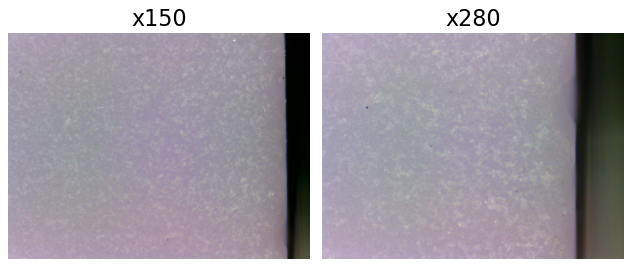

In [6]:
ngi.show_images(img_work[0],["x150","x280"],columns=2)

## 工具

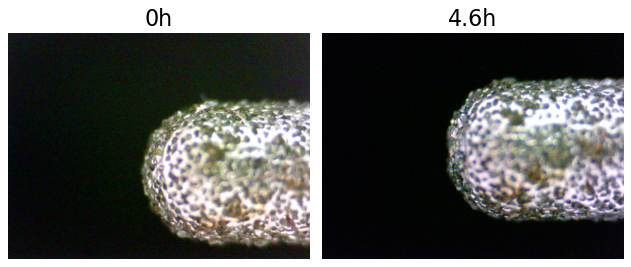

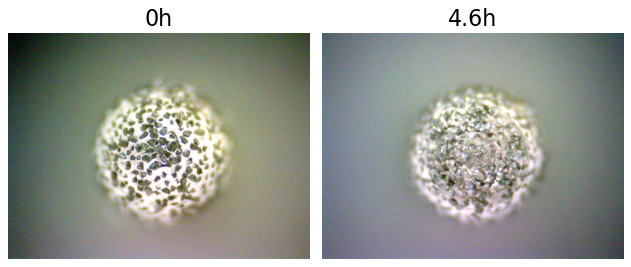

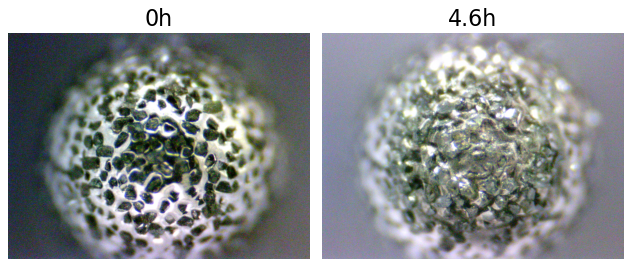

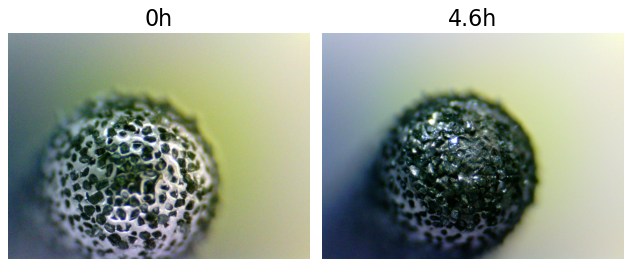

In [7]:
columns = 2
size_ftitle = len(fig_title)
ngi.show_images(tool_side,fig_title,columns=columns)
ngi.show_images(tool_froS,fig_title,columns=columns)
ngi.show_images(tool_froL,fig_title,columns=columns)
ngi.show_images(tool_naname,fig_title,columns=columns)